# Import necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:
- `Time`
- `Amount`
- `Class` (1: fraud, 0: not_fraud)

C:\Users\19162\AppData\Local\Temp\ipykernel_13784\807841329.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


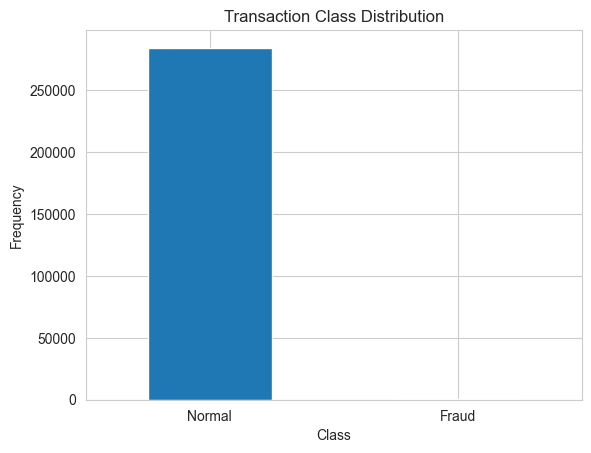

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Determine the number of fraud and valid transactions in the entire dataset.

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [10]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [11]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


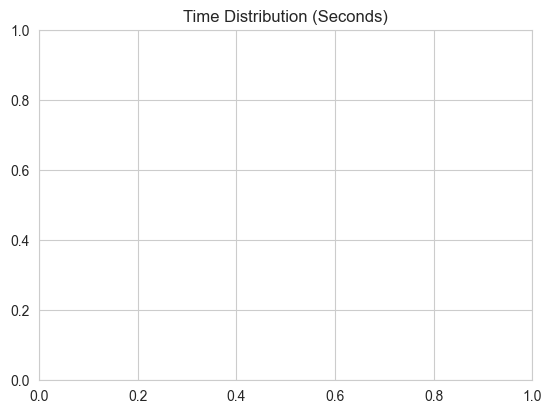

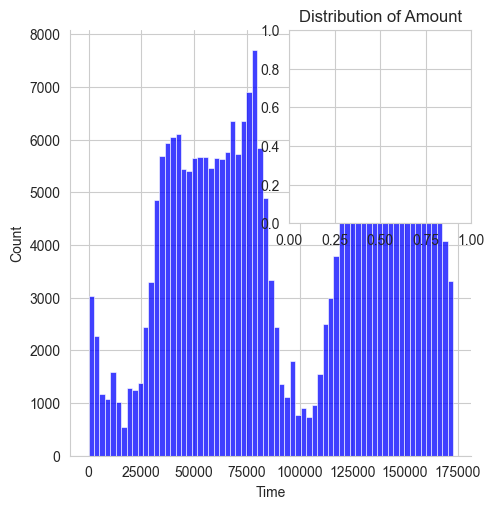

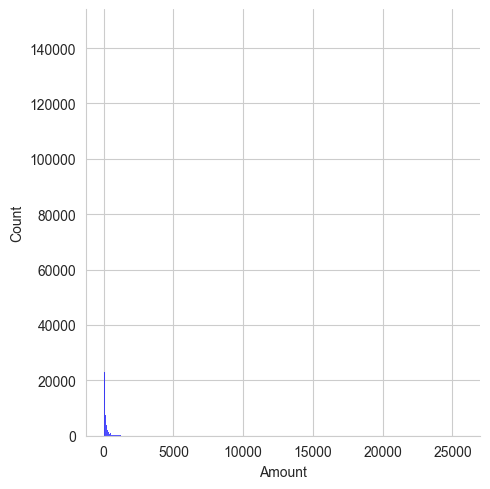

In [12]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

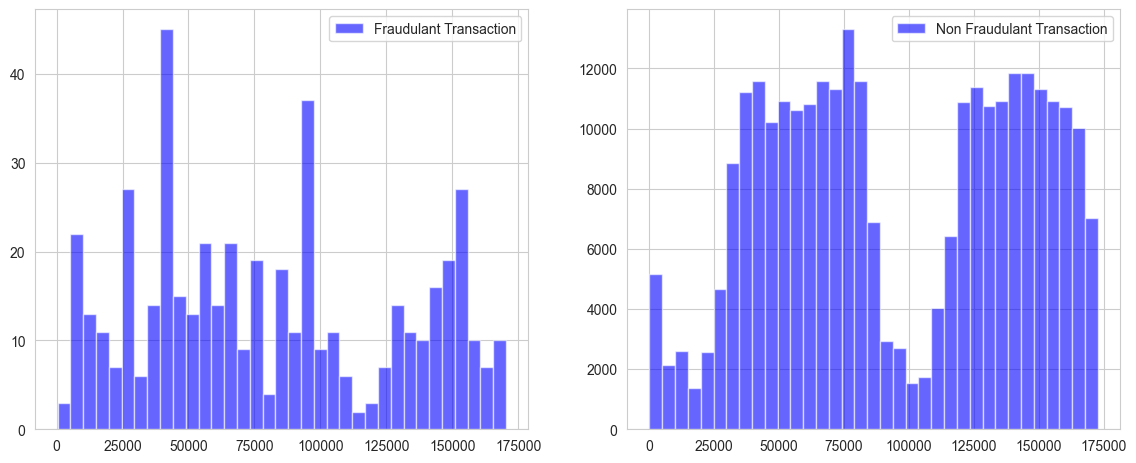

In [13]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation.
Now let us take a sample of the dataset for out modelling and prediction

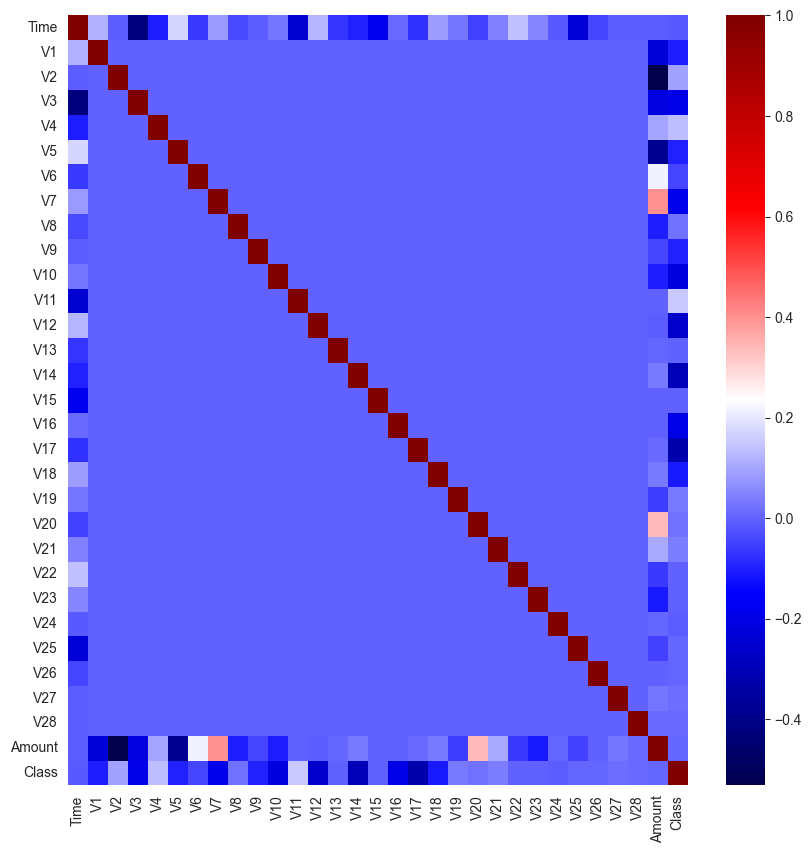

In [14]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:
    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# 3. Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [16]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# 4. Model Building
# 4. 1. Artificial Neural Network (ANNs)

In [18]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

d:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [19]:
# Create a dedicated folder to store ANN checkpoints
ckpt_dir = "checkpoints/ann"
os.makedirs(ckpt_dir, exist_ok=True)

METRICS = [
    # keras.metrics.Accuracy(name='accuracy'),  
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=METRICS
)

# Save ONLY the best model to reduce clutter
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(ckpt_dir, "best_ann_model.h5"),
    monitor="val_loss",
    mode="min",
    save_best_only=True,     # Only keep the best model file
    save_weights_only=False, # Save full model (architecture + weights)
    verbose=1
)

callbacks = [checkpoint_cb]
class_weight = {0: w_p, 1: w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=512,
    epochs=100,
    # class_weight=class_weight,  
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 65.4084 - fp: 35558.9936 - loss: 0.9081 - precision: 0.0021 - recall: 0.5250 - tn: 44167.5820 - tp: 80.0161
Epoch 1: val_loss improved from None to 0.52703, saving model to checkpoints/ann\best_ann_model.h5



Epoch 1: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - fn: 131.0000 - fp: 67305.0000 - loss: 0.8249 - precision: 0.0023 - recall: 0.5436 - tn: 91899.0000 - tp: 156.0000 - val_fn: 22.0000 - val_fp: 1580.0000 - val_loss: 0.5270 - val_precision: 0.0289 - val_recall: 0.6812 - val_tn: 38224.0000 - val_tp: 47.0000
Epoch 2/100
289/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 63.6505 - fp: 22623.3806 - loss: 0.6385 - precision: 0.0031 - recall: 0.5382 - tn: 51482.5986 - tp: 70.3702
Epoch 2: val_loss improved from 0.52703 to 0.41183, saving model to checkpoints/ann\best_ann_model.h5



Epoch 2: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 150.0000 - fp: 44420.0000 - loss: 0.5942 - precision: 0.0031 - recall: 0.4774 - tn: 114784.0000 - tp: 137.0000 - val_fn: 20.0000 - val_fp: 69.0000 - val_loss: 0.4118 - val_precision: 0.4153 - val_recall: 0.7101 - val_tn: 39735.0000 - val_tp: 49.0000
Epoch 3/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 69.0097 - fp: 13890.3419 - loss: 0.4754 - precision: 0.0046 - recall: 0.4950 - tn: 65588.1742 - tp: 68.4742
Epoch 3: val_loss improved from 0.41183 to 0.30542, saving model to checkpoints/ann\best_ann_model.h5



Epoch 3: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 151.0000 - fp: 25138.0000 - loss: 0.4417 - precision: 0.0054 - recall: 0.4739 - tn: 134066.0000 - tp: 136.0000 - val_fn: 20.0000 - val_fp: 14.0000 - val_loss: 0.3054 - val_precision: 0.7778 - val_recall: 0.7101 - val_tn: 39790.0000 - val_tp: 49.0000
Epoch 4/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 83.8400 - fp: 6587.2000 - loss: 0.3457 - precision: 0.0091 - recall: 0.4480 - tn: 70328.0200 - tp: 56.9400
Epoch 4: val_loss improved from 0.30542 to 0.21237, saving model to checkpoints/ann\best_ann_model.h5



Epoch 4: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 176.0000 - fp: 12090.0000 - loss: 0.3184 - precision: 0.0091 - recall: 0.3868 - tn: 147114.0000 - tp: 111.0000 - val_fn: 21.0000 - val_fp: 12.0000 - val_loss: 0.2124 - val_precision: 0.8000 - val_recall: 0.6957 - val_tn: 39792.0000 - val_tp: 48.0000
Epoch 5/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 86.2524 - fp: 3073.5890 - loss: 0.2424 - precision: 0.0153 - recall: 0.3720 - tn: 76149.2330 - tp: 50.9256
Epoch 5: val_loss improved from 0.21237 to 0.13520, saving model to checkpoints/ann\best_ann_model.h5



Epoch 5: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 183.0000 - fp: 5431.0000 - loss: 0.2219 - precision: 0.0188 - recall: 0.3624 - tn: 153773.0000 - tp: 104.0000 - val_fn: 21.0000 - val_fp: 9.0000 - val_loss: 0.1352 - val_precision: 0.8421 - val_recall: 0.6957 - val_tn: 39795.0000 - val_tp: 48.0000
Epoch 6/100
287/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 85.6272 - fp: 1347.9443 - loss: 0.1682 - precision: 0.0407 - recall: 0.4096 - tn: 72240.3101 - tp: 54.1185
Epoch 6: val_loss improved from 0.13520 to 0.09153, saving model to checkpoints/ann\best_ann_model.h5



Epoch 6: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 185.0000 - fp: 2616.0000 - loss: 0.1553 - precision: 0.0375 - recall: 0.3554 - tn: 156588.0000 - tp: 102.0000 - val_fn: 21.0000 - val_fp: 9.0000 - val_loss: 0.0915 - val_precision: 0.8421 - val_recall: 0.6957 - val_tn: 39795.0000 - val_tp: 48.0000
Epoch 7/100
290/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 94.1034 - fp: 749.5862 - loss: 0.1206 - precision: 0.0461 - recall: 0.2787 - tn: 73612.3138 - tp: 39.9966
Epoch 7: val_loss improved from 0.09153 to 0.06078, saving model to checkpoints/ann\best_ann_model.h5



Epoch 7: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 200.0000 - fp: 1469.0000 - loss: 0.1109 - precision: 0.0559 - recall: 0.3031 - tn: 157735.0000 - tp: 87.0000 - val_fn: 17.0000 - val_fp: 10.0000 - val_loss: 0.0608 - val_precision: 0.8387 - val_recall: 0.7536 - val_tn: 39794.0000 - val_tp: 52.0000
Epoch 8/100
290/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 93.0034 - fp: 471.2655 - loss: 0.0896 - precision: 0.0922 - recall: 0.3457 - tn: 73883.4448 - tp: 48.2862
Epoch 8: val_loss improved from 0.06078 to 0.04509, saving model to checkpoints/ann\best_ann_model.h5



Epoch 8: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 183.0000 - fp: 924.0000 - loss: 0.0817 - precision: 0.1012 - recall: 0.3624 - tn: 158280.0000 - tp: 104.0000 - val_fn: 19.0000 - val_fp: 10.0000 - val_loss: 0.0451 - val_precision: 0.8333 - val_recall: 0.7246 - val_tn: 39794.0000 - val_tp: 50.0000
Epoch 9/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 86.1125 - fp: 312.1061 - loss: 0.0640 - precision: 0.1368 - recall: 0.3650 - tn: 79419.7717 - tp: 54.0096
Epoch 9: val_loss improved from 0.04509 to 0.03251, saving model to checkpoints/ann\best_ann_model.h5



Epoch 9: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 171.0000 - fp: 604.0000 - loss: 0.0590 - precision: 0.1611 - recall: 0.4042 - tn: 158600.0000 - tp: 116.0000 - val_fn: 18.0000 - val_fp: 13.0000 - val_loss: 0.0325 - val_precision: 0.7969 - val_recall: 0.7391 - val_tn: 39791.0000 - val_tp: 51.0000
Epoch 10/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 80.8247 - fp: 214.1883 - loss: 0.0493 - precision: 0.2248 - recall: 0.4194 - tn: 78748.5130 - tp: 60.4740
Epoch 10: val_loss improved from 0.03251 to 0.02560, saving model to checkpoints/ann\best_ann_model.h5



Epoch 10: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 163.0000 - fp: 425.0000 - loss: 0.0460 - precision: 0.2259 - recall: 0.4321 - tn: 158779.0000 - tp: 124.0000 - val_fn: 17.0000 - val_fp: 14.0000 - val_loss: 0.0256 - val_precision: 0.7879 - val_recall: 0.7536 - val_tn: 39790.0000 - val_tp: 52.0000
Epoch 11/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 82.9934 - fp: 172.2164 - loss: 0.0396 - precision: 0.2157 - recall: 0.3721 - tn: 78028.8033 - tp: 51.9869
Epoch 11: val_loss improved from 0.02560 to 0.02027, saving model to checkpoints/ann\best_ann_model.h5



Epoch 11: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 170.0000 - fp: 335.0000 - loss: 0.0370 - precision: 0.2588 - recall: 0.4077 - tn: 158869.0000 - tp: 117.0000 - val_fn: 16.0000 - val_fp: 14.0000 - val_loss: 0.0203 - val_precision: 0.7910 - val_recall: 0.7681 - val_tn: 39790.0000 - val_tp: 53.0000
Epoch 12/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 78.7083 - fp: 134.3494 - loss: 0.0322 - precision: 0.3658 - recall: 0.4836 - tn: 79838.7821 - tp: 75.3494
Epoch 12: val_loss improved from 0.02027 to 0.01763, saving model to checkpoints/ann\best_ann_model.h5



Epoch 12: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 148.0000 - fp: 269.0000 - loss: 0.0305 - precision: 0.3407 - recall: 0.4843 - tn: 158935.0000 - tp: 139.0000 - val_fn: 16.0000 - val_fp: 14.0000 - val_loss: 0.0176 - val_precision: 0.7910 - val_recall: 0.7681 - val_tn: 39790.0000 - val_tp: 53.0000
Epoch 13/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 74.0647 - fp: 92.0097 - loss: 0.0249 - precision: 0.4232 - recall: 0.4642 - tn: 79123.8123 - tp: 70.1133 
Epoch 13: val_loss improved from 0.01763 to 0.01525, saving model to checkpoints/ann\best_ann_model.h5



Epoch 13: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 148.0000 - fp: 187.0000 - loss: 0.0240 - precision: 0.4264 - recall: 0.4843 - tn: 159017.0000 - tp: 139.0000 - val_fn: 16.0000 - val_fp: 14.0000 - val_loss: 0.0153 - val_precision: 0.7910 - val_recall: 0.7681 - val_tn: 39790.0000 - val_tp: 53.0000
Epoch 14/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 71.5097 - fp: 103.6039 - loss: 0.0221 - precision: 0.3635 - recall: 0.4601 - tn: 78863.1721 - tp: 65.7143
Epoch 14: val_loss improved from 0.01525 to 0.01392, saving model to checkpoints/ann\best_ann_model.h5



Epoch 14: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 145.0000 - fp: 202.0000 - loss: 0.0220 - precision: 0.4128 - recall: 0.4948 - tn: 159002.0000 - tp: 142.0000 - val_fn: 14.0000 - val_fp: 14.0000 - val_loss: 0.0139 - val_precision: 0.7971 - val_recall: 0.7971 - val_tn: 39790.0000 - val_tp: 55.0000
Epoch 15/100
292/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 65.5685 - fp: 70.0205 - loss: 0.0210 - precision: 0.5121 - recall: 0.4945 - tn: 74798.5582 - tp: 73.8527
Epoch 15: val_loss improved from 0.01392 to 0.01273, saving model to checkpoints/ann\best_ann_model.h5



Epoch 15: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 130.0000 - fp: 154.0000 - loss: 0.0188 - precision: 0.5048 - recall: 0.5470 - tn: 159050.0000 - tp: 157.0000 - val_fn: 16.0000 - val_fp: 14.0000 - val_loss: 0.0127 - val_precision: 0.7910 - val_recall: 0.7681 - val_tn: 39790.0000 - val_tp: 53.0000
Epoch 16/100
289/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.3218 - fp: 59.3287 - loss: 0.0168 - precision: 0.5532 - recall: 0.5683 - tn: 74049.1799 - tp: 74.1696
Epoch 16: val_loss improved from 0.01273 to 0.01119, saving model to checkpoints/ann\best_ann_model.h5



Epoch 16: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 131.0000 - fp: 118.0000 - loss: 0.0165 - precision: 0.5693 - recall: 0.5436 - tn: 159086.0000 - tp: 156.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0112 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 17/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 63.7508 - fp: 53.3803 - loss: 0.0146 - precision: 0.5798 - recall: 0.5644 - tn: 78142.9311 - tp: 75.9377    
Epoch 17: val_loss improved from 0.01119 to 0.01110, saving model to checkpoints/ann\best_ann_model.h5



Epoch 17: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 132.0000 - fp: 101.0000 - loss: 0.0145 - precision: 0.6055 - recall: 0.5401 - tn: 159103.0000 - tp: 155.0000 - val_fn: 15.0000 - val_fp: 11.0000 - val_loss: 0.0111 - val_precision: 0.8308 - val_recall: 0.7826 - val_tn: 39793.0000 - val_tp: 54.0000
Epoch 18/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 63.3658 - fp: 45.6141 - loss: 0.0144 - precision: 0.5961 - recall: 0.5037 - tn: 76363.8523 - tp: 71.1678
Epoch 18: val_loss improved from 0.01110 to 0.01014, saving model to checkpoints/ann\best_ann_model.h5



Epoch 18: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 129.0000 - fp: 98.0000 - loss: 0.0135 - precision: 0.6172 - recall: 0.5505 - tn: 159106.0000 - tp: 158.0000 - val_fn: 15.0000 - val_fp: 11.0000 - val_loss: 0.0101 - val_precision: 0.8308 - val_recall: 0.7826 - val_tn: 39793.0000 - val_tp: 54.0000
Epoch 19/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 62.6053 - fp: 42.8717 - loss: 0.0136 - precision: 0.6491 - recall: 0.5906 - tn: 77891.5132 - tp: 83.0099 
Epoch 19: val_loss improved from 0.01014 to 0.00983, saving model to checkpoints/ann\best_ann_model.h5



Epoch 19: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 129.0000 - fp: 85.0000 - loss: 0.0133 - precision: 0.6502 - recall: 0.5505 - tn: 159119.0000 - tp: 158.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0098 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 20/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.2947 - fp: 33.2980 - loss: 0.0113 - precision: 0.7262 - recall: 0.6232 - tn: 77394.5430 - tp: 85.8642   
Epoch 20: val_loss improved from 0.00983 to 0.00919, saving model to checkpoints/ann\best_ann_model.h5



Epoch 20: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 117.0000 - fp: 70.0000 - loss: 0.0120 - precision: 0.7083 - recall: 0.5923 - tn: 159134.0000 - tp: 170.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0092 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 21/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 63.4531 - fp: 34.5275 - loss: 0.0104 - precision: 0.7061 - recall: 0.5537 - tn: 79182.2492 - tp: 79.7702
Epoch 21: val_loss improved from 0.00919 to 0.00889, saving model to checkpoints/ann\best_ann_model.h5



Epoch 21: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 126.0000 - fp: 79.0000 - loss: 0.0112 - precision: 0.6708 - recall: 0.5610 - tn: 159125.0000 - tp: 161.0000 - val_fn: 18.0000 - val_fp: 11.0000 - val_loss: 0.0089 - val_precision: 0.8226 - val_recall: 0.7391 - val_tn: 39793.0000 - val_tp: 51.0000
Epoch 22/100
296/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 60.7939 - fp: 29.8818 - loss: 0.0096 - precision: 0.7143 - recall: 0.5356 - tn: 75865.6250 - tp: 75.6993  
Epoch 22: val_loss improved from 0.00889 to 0.00854, saving model to checkpoints/ann\best_ann_model.h5



Epoch 22: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 120.0000 - fp: 66.0000 - loss: 0.0098 - precision: 0.7167 - recall: 0.5819 - tn: 159138.0000 - tp: 167.0000 - val_fn: 17.0000 - val_fp: 11.0000 - val_loss: 0.0085 - val_precision: 0.8254 - val_recall: 0.7536 - val_tn: 39793.0000 - val_tp: 52.0000
Epoch 23/100
294/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 63.7925 - fp: 27.9218 - loss: 0.0109 - precision: 0.7008 - recall: 0.5375 - tn: 75349.8639 - tp: 78.4218
Epoch 23: val_loss improved from 0.00854 to 0.00852, saving model to checkpoints/ann\best_ann_model.h5



Epoch 23: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 125.0000 - fp: 57.0000 - loss: 0.0098 - precision: 0.7397 - recall: 0.5645 - tn: 159147.0000 - tp: 162.0000 - val_fn: 17.0000 - val_fp: 11.0000 - val_loss: 0.0085 - val_precision: 0.8254 - val_recall: 0.7536 - val_tn: 39793.0000 - val_tp: 52.0000
Epoch 24/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 64.7285 - fp: 25.0066 - loss: 0.0102 - precision: 0.7112 - recall: 0.5074 - tn: 77404.2185 - tp: 74.0464  
Epoch 24: val_loss did not improve from 0.00852
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 123.0000 - fp: 52.0000 - loss: 0.0087 - precision: 0.7593 - recall: 0.5714 - tn: 159152.0000 - tp: 164.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0085 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 25/100
297/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 55.4141 - fp: 28.4512 - loss: 0.0083 - precision: 0.7459 - recall: 


Epoch 25: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 118.0000 - fp: 55.0000 - loss: 0.0089 - precision: 0.7545 - recall: 0.5889 - tn: 159149.0000 - tp: 169.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0082 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 26/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.7190 - fp: 25.4641 - loss: 0.0078 - precision: 0.7429 - recall: 0.5728 - tn: 78435.2908 - tp: 74.5261  
Epoch 26: val_loss did not improve from 0.00821
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 126.0000 - fp: 52.0000 - loss: 0.0085 - precision: 0.7559 - recall: 0.5610 - tn: 159152.0000 - tp: 161.0000 - val_fn: 16.0000 - val_fp: 11.0000 - val_loss: 0.0084 - val_precision: 0.8281 - val_recall: 0.7681 - val_tn: 39793.0000 - val_tp: 53.0000
Epoch 27/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 55.6786 - fp: 20.6136 - loss: 0.0082 - precision: 0.8039 - recall: 


Epoch 28: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 48.0000 - loss: 0.0078 - precision: 0.7828 - recall: 0.6028 - tn: 159156.0000 - tp: 173.0000 - val_fn: 19.0000 - val_fp: 11.0000 - val_loss: 0.0080 - val_precision: 0.8197 - val_recall: 0.7246 - val_tn: 39793.0000 - val_tp: 50.0000
Epoch 29/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.1516 - fp: 24.5871 - loss: 0.0074 - precision: 0.7538 - recall: 0.5996 - tn: 79455.4355 - tp: 81.8258
Epoch 29: val_loss improved from 0.00804 to 0.00784, saving model to checkpoints/ann\best_ann_model.h5



Epoch 29: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 119.0000 - fp: 51.0000 - loss: 0.0077 - precision: 0.7671 - recall: 0.5854 - tn: 159153.0000 - tp: 168.0000 - val_fn: 21.0000 - val_fp: 10.0000 - val_loss: 0.0078 - val_precision: 0.8276 - val_recall: 0.6957 - val_tn: 39794.0000 - val_tp: 48.0000
Epoch 30/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.0584 - fp: 27.1494 - loss: 0.0080 - precision: 0.7552 - recall: 0.6262 - tn: 78932.1558 - tp: 88.6364
Epoch 30: val_loss improved from 0.00784 to 0.00778, saving model to checkpoints/ann\best_ann_model.h5



Epoch 30: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 119.0000 - fp: 47.0000 - loss: 0.0078 - precision: 0.7814 - recall: 0.5854 - tn: 159157.0000 - tp: 168.0000 - val_fn: 21.0000 - val_fp: 10.0000 - val_loss: 0.0078 - val_precision: 0.8276 - val_recall: 0.6957 - val_tn: 39794.0000 - val_tp: 48.0000
Epoch 31/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.9802 - fp: 25.1023 - loss: 0.0080 - precision: 0.7070 - recall: 0.5586 - tn: 77662.7459 - tp: 78.1716
Epoch 31: val_loss improved from 0.00778 to 0.00777, saving model to checkpoints/ann\best_ann_model.h5



Epoch 31: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 125.0000 - fp: 45.0000 - loss: 0.0080 - precision: 0.7826 - recall: 0.5645 - tn: 159159.0000 - tp: 162.0000 - val_fn: 21.0000 - val_fp: 10.0000 - val_loss: 0.0078 - val_precision: 0.8276 - val_recall: 0.6957 - val_tn: 39794.0000 - val_tp: 48.0000
Epoch 32/100
295/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.2407 - fp: 27.2576 - loss: 0.0074 - precision: 0.7189 - recall: 0.6114 - tn: 75610.6610 - tp: 83.8407
Epoch 32: val_loss improved from 0.00777 to 0.00732, saving model to checkpoints/ann\best_ann_model.h5



Epoch 32: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 51.0000 - loss: 0.0068 - precision: 0.7723 - recall: 0.6028 - tn: 159153.0000 - tp: 173.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0073 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 33/100
292/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 61.0514 - fp: 20.7740 - loss: 0.0071 - precision: 0.7630 - recall: 0.5528 - tn: 74850.7260 - tp: 75.4486
Epoch 33: val_loss did not improve from 0.00732
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 128.0000 - fp: 39.0000 - loss: 0.0074 - precision: 0.8030 - recall: 0.5540 - tn: 159165.0000 - tp: 159.0000 - val_fn: 23.0000 - val_fp: 9.0000 - val_loss: 0.0074 - val_precision: 0.8364 - val_recall: 0.6667 - val_tn: 39795.0000 - val_tp: 46.0000
Epoch 34/100
307/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 62.7785 - fp: 24.3974 - loss: 0.0077 - precision: 0.7400 - recall: 0.53


Epoch 34: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 119.0000 - fp: 44.0000 - loss: 0.0071 - precision: 0.7925 - recall: 0.5854 - tn: 159160.0000 - tp: 168.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0071 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 35/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.8609 - fp: 20.5397 - loss: 0.0072 - precision: 0.7825 - recall: 0.5715 - tn: 77410.7914 - tp: 78.8079
Epoch 35: val_loss improved from 0.00710 to 0.00707, saving model to checkpoints/ann\best_ann_model.h5



Epoch 35: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 119.0000 - fp: 41.0000 - loss: 0.0074 - precision: 0.8038 - recall: 0.5854 - tn: 159163.0000 - tp: 168.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0071 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 36/100
307/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 51.7883 - fp: 20.4691 - loss: 0.0065 - precision: 0.7631 - recall: 0.6365 - tn: 78698.2899 - tp: 77.4528
Epoch 36: val_loss improved from 0.00707 to 0.00687, saving model to checkpoints/ann\best_ann_model.h5



Epoch 36: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 121.0000 - fp: 37.0000 - loss: 0.0070 - precision: 0.8177 - recall: 0.5784 - tn: 159167.0000 - tp: 166.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0069 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 37/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 64.6667 - fp: 17.5163 - loss: 0.0068 - precision: 0.8230 - recall: 0.5549 - tn: 78430.0294 - tp: 79.7876   
Epoch 37: val_loss improved from 0.00687 to 0.00681, saving model to checkpoints/ann\best_ann_model.h5



Epoch 37: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 120.0000 - fp: 38.0000 - loss: 0.0071 - precision: 0.8146 - recall: 0.5819 - tn: 159166.0000 - tp: 167.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0068 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 38/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 60.6333 - fp: 17.8700 - loss: 0.0069 - precision: 0.7841 - recall: 0.5677 - tn: 76903.5400 - tp: 73.9567      
Epoch 38: val_loss did not improve from 0.00681
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 125.0000 - fp: 34.0000 - loss: 0.0067 - precision: 0.8265 - recall: 0.5645 - tn: 159170.0000 - tp: 162.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0068 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 39/100
287/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.1847 - fp: 13.3415 - loss: 0.0059 - precision: 0.8602 - recall


Epoch 39: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 118.0000 - fp: 34.0000 - loss: 0.0064 - precision: 0.8325 - recall: 0.5889 - tn: 159170.0000 - tp: 169.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0066 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 40/100
307/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 59.8925 - fp: 19.4137 - loss: 0.0074 - precision: 0.7805 - recall: 0.5801 - tn: 78683.8990 - tp: 84.7948
Epoch 40: val_loss improved from 0.00661 to 0.00636, saving model to checkpoints/ann\best_ann_model.h5



Epoch 40: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 123.0000 - fp: 35.0000 - loss: 0.0068 - precision: 0.8241 - recall: 0.5714 - tn: 159169.0000 - tp: 164.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0064 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 41/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.6720 - fp: 18.5370 - loss: 0.0052 - precision: 0.8145 - recall: 0.5799 - tn: 79710.3601 - tp: 86.4309   
Epoch 41: val_loss did not improve from 0.00636
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 111.0000 - fp: 39.0000 - loss: 0.0055 - precision: 0.8186 - recall: 0.6132 - tn: 159165.0000 - tp: 176.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0064 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 42/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.2201 - fp: 16.7540 - loss: 0.0056 - precision: 0.8390 - recall: 0


Epoch 42: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 116.0000 - fp: 40.0000 - loss: 0.0061 - precision: 0.8104 - recall: 0.5958 - tn: 159164.0000 - tp: 171.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0063 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 43/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.2053 - fp: 23.4603 - loss: 0.0080 - precision: 0.7814 - recall: 0.5944 - tn: 77399.5298 - tp: 87.8046
Epoch 43: val_loss improved from 0.00632 to 0.00623, saving model to checkpoints/ann\best_ann_model.h5



Epoch 43: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 46.0000 - loss: 0.0065 - precision: 0.7900 - recall: 0.6028 - tn: 159158.0000 - tp: 173.0000 - val_fn: 25.0000 - val_fp: 7.0000 - val_loss: 0.0062 - val_precision: 0.8627 - val_recall: 0.6377 - val_tn: 39797.0000 - val_tp: 44.0000
Epoch 44/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 57.5338 - fp: 15.8971 - loss: 0.0053 - precision: 0.8192 - recall: 0.6171 - tn: 79713.7170 - tp: 84.8521    
Epoch 44: val_loss improved from 0.00623 to 0.00616, saving model to checkpoints/ann\best_ann_model.h5



Epoch 44: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 118.0000 - fp: 33.0000 - loss: 0.0055 - precision: 0.8366 - recall: 0.5889 - tn: 159171.0000 - tp: 169.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0062 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 45/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.7929 - fp: 16.1165 - loss: 0.0055 - precision: 0.8497 - recall: 0.6112 - tn: 79200.9773 - tp: 86.1133    
Epoch 45: val_loss did not improve from 0.00616
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 30.0000 - loss: 0.0056 - precision: 0.8522 - recall: 0.6028 - tn: 159174.0000 - tp: 173.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0062 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 46/100
292/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 48.6815 - fp: 13.8459 - loss: 0.0048 - precision: 0.8722 - recall: 


Epoch 46: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 104.0000 - fp: 34.0000 - loss: 0.0055 - precision: 0.8433 - recall: 0.6376 - tn: 159170.0000 - tp: 183.0000 - val_fn: 24.0000 - val_fp: 8.0000 - val_loss: 0.0062 - val_precision: 0.8491 - val_recall: 0.6522 - val_tn: 39796.0000 - val_tp: 45.0000
Epoch 47/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 53.7279 - fp: 18.6066 - loss: 0.0061 - precision: 0.7976 - recall: 0.5942 - tn: 78181.3443 - tp: 82.3213
Epoch 47: val_loss improved from 0.00615 to 0.00600, saving model to checkpoints/ann\best_ann_model.h5



Epoch 47: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 111.0000 - fp: 37.0000 - loss: 0.0060 - precision: 0.8263 - recall: 0.6132 - tn: 159167.0000 - tp: 176.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0060 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 48/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 55.2032 - fp: 16.3194 - loss: 0.0052 - precision: 0.8344 - recall: 0.5969 - tn: 79458.3258 - tp: 86.1516
Epoch 48: val_loss improved from 0.00600 to 0.00594, saving model to checkpoints/ann\best_ann_model.h5



Epoch 48: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 115.0000 - fp: 37.0000 - loss: 0.0053 - precision: 0.8230 - recall: 0.5993 - tn: 159167.0000 - tp: 172.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0059 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 49/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 49.2871 - fp: 21.3729 - loss: 0.0051 - precision: 0.7995 - recall: 0.6508 - tn: 77664.3366 - tp: 89.0033
Epoch 49: val_loss improved from 0.00594 to 0.00587, saving model to checkpoints/ann\best_ann_model.h5



Epoch 49: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 101.0000 - fp: 38.0000 - loss: 0.0051 - precision: 0.8304 - recall: 0.6481 - tn: 159166.0000 - tp: 186.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0059 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 50/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.8155 - fp: 19.0550 - loss: 0.0059 - precision: 0.8143 - recall: 0.6083 - tn: 79199.9353 - tp: 86.1942
Epoch 50: val_loss did not improve from 0.00587
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 37.0000 - loss: 0.0059 - precision: 0.8238 - recall: 0.6028 - tn: 159167.0000 - tp: 173.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0060 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 51/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 55.5980 - fp: 20.7451 - loss: 0.0060 - precision: 0.7711 - recall: 0.58


Epoch 51: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 119.0000 - fp: 32.0000 - loss: 0.0057 - precision: 0.8400 - recall: 0.5854 - tn: 159172.0000 - tp: 168.0000 - val_fn: 23.0000 - val_fp: 8.0000 - val_loss: 0.0058 - val_precision: 0.8519 - val_recall: 0.6667 - val_tn: 39796.0000 - val_tp: 46.0000
Epoch 52/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 60.0974 - fp: 16.9351 - loss: 0.0060 - precision: 0.8410 - recall: 0.5946 - tn: 78936.5292 - tp: 90.4383
Epoch 52: val_loss improved from 0.00579 to 0.00554, saving model to checkpoints/ann\best_ann_model.h5



Epoch 52: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 109.0000 - fp: 36.0000 - loss: 0.0058 - precision: 0.8318 - recall: 0.6202 - tn: 159168.0000 - tp: 178.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0055 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 53/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 59.6046 - fp: 20.5556 - loss: 0.0059 - precision: 0.7353 - recall: 0.5241 - tn: 78441.1503 - tp: 70.6895       
Epoch 53: val_loss improved from 0.00554 to 0.00552, saving model to checkpoints/ann\best_ann_model.h5



Epoch 53: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 126.0000 - fp: 31.0000 - loss: 0.0055 - precision: 0.8385 - recall: 0.5610 - tn: 159173.0000 - tp: 161.0000 - val_fn: 25.0000 - val_fp: 7.0000 - val_loss: 0.0055 - val_precision: 0.8627 - val_recall: 0.6377 - val_tn: 39797.0000 - val_tp: 44.0000
Epoch 54/100
287/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 48.9895 - fp: 13.3031 - loss: 0.0046 - precision: 0.8705 - recall: 0.6476 - tn: 73581.3972 - tp: 84.3101
Epoch 54: val_loss did not improve from 0.00552
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 113.0000 - fp: 34.0000 - loss: 0.0052 - precision: 0.8365 - recall: 0.6063 - tn: 159170.0000 - tp: 174.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0055 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 55/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 51.3537 - fp: 12.8746 - loss: 0.0048 - precision: 0.8766 - recall: 0.59


Epoch 55: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 105.0000 - fp: 32.0000 - loss: 0.0050 - precision: 0.8505 - recall: 0.6341 - tn: 159172.0000 - tp: 182.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0054 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 56/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 53.8968 - fp: 17.1194 - loss: 0.0057 - precision: 0.8414 - recall: 0.6143 - tn: 79450.1419 - tp: 94.8419
Epoch 56: val_loss improved from 0.00543 to 0.00530, saving model to checkpoints/ann\best_ann_model.h5



Epoch 56: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 99.0000 - fp: 32.0000 - loss: 0.0049 - precision: 0.8545 - recall: 0.6551 - tn: 159172.0000 - tp: 188.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0053 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 57/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 52.9547 - fp: 13.8608 - loss: 0.0046 - precision: 0.8752 - recall: 0.6560 - tn: 79191.2557 - tp: 101.9288
Epoch 57: val_loss did not improve from 0.00530
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 99.0000 - fp: 28.0000 - loss: 0.0048 - precision: 0.8704 - recall: 0.6551 - tn: 159176.0000 - tp: 188.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0053 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 58/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 60.9065 - fp: 15.8419 - loss: 0.0048 - precision: 0.8496 - recall: 0.567


Epoch 58: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 118.0000 - fp: 36.0000 - loss: 0.0054 - precision: 0.8244 - recall: 0.5889 - tn: 159168.0000 - tp: 169.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0052 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 59/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 59.3961 - fp: 16.4221 - loss: 0.0053 - precision: 0.8190 - recall: 0.5816 - tn: 78947.5065 - tp: 80.6753
Epoch 59: val_loss improved from 0.00522 to 0.00514, saving model to checkpoints/ann\best_ann_model.h5



Epoch 59: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 117.0000 - fp: 32.0000 - loss: 0.0052 - precision: 0.8416 - recall: 0.5923 - tn: 159172.0000 - tp: 170.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0051 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 60/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.7717 - fp: 14.1350 - loss: 0.0048 - precision: 0.8430 - recall: 0.6152 - tn: 79708.1222 - tp: 94.9711   
Epoch 60: val_loss improved from 0.00514 to 0.00512, saving model to checkpoints/ann\best_ann_model.h5



Epoch 60: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 106.0000 - fp: 27.0000 - loss: 0.0048 - precision: 0.8702 - recall: 0.6307 - tn: 159177.0000 - tp: 181.0000 - val_fn: 24.0000 - val_fp: 8.0000 - val_loss: 0.0051 - val_precision: 0.8491 - val_recall: 0.6522 - val_tn: 39796.0000 - val_tp: 45.0000
Epoch 61/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.9194 - fp: 17.9355 - loss: 0.0057 - precision: 0.7987 - recall: 0.5817 - tn: 79460.4581 - tp: 80.6871
Epoch 61: val_loss improved from 0.00512 to 0.00505, saving model to checkpoints/ann\best_ann_model.h5



Epoch 61: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 118.0000 - fp: 36.0000 - loss: 0.0055 - precision: 0.8244 - recall: 0.5889 - tn: 159168.0000 - tp: 169.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 62/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 52.0518 - fp: 13.5534 - loss: 0.0040 - precision: 0.8851 - recall: 0.6409 - tn: 79205.3625 - tp: 89.0324
Epoch 62: val_loss improved from 0.00505 to 0.00501, saving model to checkpoints/ann\best_ann_model.h5



Epoch 62: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 109.0000 - fp: 30.0000 - loss: 0.0049 - precision: 0.8558 - recall: 0.6202 - tn: 159174.0000 - tp: 178.0000 - val_fn: 26.0000 - val_fp: 6.0000 - val_loss: 0.0050 - val_precision: 0.8776 - val_recall: 0.6232 - val_tn: 39798.0000 - val_tp: 43.0000
Epoch 63/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.4142 - fp: 14.5793 - loss: 0.0046 - precision: 0.8564 - recall: 0.6014 - tn: 79205.8317 - tp: 83.1748
Epoch 63: val_loss improved from 0.00501 to 0.00499, saving model to checkpoints/ann\best_ann_model.h5



Epoch 63: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 117.0000 - fp: 35.0000 - loss: 0.0051 - precision: 0.8293 - recall: 0.5923 - tn: 159169.0000 - tp: 170.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 64/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 58.1194 - fp: 15.2419 - loss: 0.0046 - precision: 0.8457 - recall: 0.6030 - tn: 79451.7258 - tp: 90.9129
Epoch 64: val_loss improved from 0.00499 to 0.00496, saving model to checkpoints/ann\best_ann_model.h5



Epoch 64: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 31.0000 - loss: 0.0048 - precision: 0.8480 - recall: 0.6028 - tn: 159173.0000 - tp: 173.0000 - val_fn: 25.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8627 - val_recall: 0.6377 - val_tn: 39797.0000 - val_tp: 44.0000
Epoch 65/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 55.8929 - fp: 13.0292 - loss: 0.0053 - precision: 0.8661 - recall: 0.6213 - tn: 78945.2857 - tp: 89.7922 
Epoch 65: val_loss improved from 0.00496 to 0.00494, saving model to checkpoints/ann\best_ann_model.h5



Epoch 65: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 105.0000 - fp: 26.0000 - loss: 0.0047 - precision: 0.8750 - recall: 0.6341 - tn: 159178.0000 - tp: 182.0000 - val_fn: 26.0000 - val_fp: 6.0000 - val_loss: 0.0049 - val_precision: 0.8776 - val_recall: 0.6232 - val_tn: 39798.0000 - val_tp: 43.0000
Epoch 66/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 52.4226 - fp: 17.2516 - loss: 0.0045 - precision: 0.8349 - recall: 0.6486 - tn: 79458.2581 - tp: 88.0677     
Epoch 66: val_loss improved from 0.00494 to 0.00492, saving model to checkpoints/ann\best_ann_model.h5



Epoch 66: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 110.0000 - fp: 30.0000 - loss: 0.0046 - precision: 0.8551 - recall: 0.6167 - tn: 159174.0000 - tp: 177.0000 - val_fn: 25.0000 - val_fp: 7.0000 - val_loss: 0.0049 - val_precision: 0.8627 - val_recall: 0.6377 - val_tn: 39797.0000 - val_tp: 44.0000
Epoch 67/100
295/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 46.7458 - fp: 14.8034 - loss: 0.0040 - precision: 0.8482 - recall: 0.6348 - tn: 75632.7085 - tp: 81.7424   
Epoch 67: val_loss did not improve from 0.00492
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 104.0000 - fp: 33.0000 - loss: 0.0050 - precision: 0.8472 - recall: 0.6376 - tn: 159171.0000 - tp: 183.0000 - val_fn: 26.0000 - val_fp: 6.0000 - val_loss: 0.0049 - val_precision: 0.8776 - val_recall: 0.6232 - val_tn: 39798.0000 - val_tp: 43.0000
Epoch 68/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.7800 - fp: 18.1233 - loss: 0.0054 - precision: 0.8382 - recall: 0


Epoch 68: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 109.0000 - fp: 32.0000 - loss: 0.0047 - precision: 0.8476 - recall: 0.6202 - tn: 159172.0000 - tp: 178.0000 - val_fn: 26.0000 - val_fp: 6.0000 - val_loss: 0.0049 - val_precision: 0.8776 - val_recall: 0.6232 - val_tn: 39798.0000 - val_tp: 43.0000
Epoch 69/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 47.7010 - fp: 14.1061 - loss: 0.0036 - precision: 0.8691 - recall: 0.6742 - tn: 79715.2347 - tp: 94.9582   
Epoch 69: val_loss improved from 0.00488 to 0.00479, saving model to checkpoints/ann\best_ann_model.h5



Epoch 69: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 105.0000 - fp: 28.0000 - loss: 0.0044 - precision: 0.8667 - recall: 0.6341 - tn: 159176.0000 - tp: 182.0000 - val_fn: 25.0000 - val_fp: 6.0000 - val_loss: 0.0048 - val_precision: 0.8800 - val_recall: 0.6377 - val_tn: 39798.0000 - val_tp: 44.0000
Epoch 70/100
307/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 53.6221 - fp: 14.5049 - loss: 0.0045 - precision: 0.8679 - recall: 0.6327 - tn: 78692.8599 - tp: 87.0130
Epoch 70: val_loss did not improve from 0.00479
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 111.0000 - fp: 29.0000 - loss: 0.0047 - precision: 0.8585 - recall: 0.6132 - tn: 159175.0000 - tp: 176.0000 - val_fn: 25.0000 - val_fp: 7.0000 - val_loss: 0.0048 - val_precision: 0.8627 - val_recall: 0.6377 - val_tn: 39797.0000 - val_tp: 44.0000
Epoch 71/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 53.8170 - fp: 16.0948 - loss: 0.0050 - precision: 0.8233 - recall: 0.62


Epoch 71: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 107.0000 - fp: 29.0000 - loss: 0.0046 - precision: 0.8612 - recall: 0.6272 - tn: 159175.0000 - tp: 180.0000 - val_fn: 25.0000 - val_fp: 6.0000 - val_loss: 0.0048 - val_precision: 0.8800 - val_recall: 0.6377 - val_tn: 39798.0000 - val_tp: 44.0000
Epoch 72/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 44.0693 - fp: 13.7327 - loss: 0.0044 - precision: 0.8877 - recall: 0.7067 - tn: 77663.1848 - tp: 103.0132
Epoch 72: val_loss improved from 0.00478 to 0.00475, saving model to checkpoints/ann\best_ann_model.h5



Epoch 72: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 92.0000 - fp: 27.0000 - loss: 0.0043 - precision: 0.8784 - recall: 0.6794 - tn: 159177.0000 - tp: 195.0000 - val_fn: 25.0000 - val_fp: 6.0000 - val_loss: 0.0047 - val_precision: 0.8800 - val_recall: 0.6377 - val_tn: 39798.0000 - val_tp: 44.0000
Epoch 73/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 54.0164 - fp: 16.1607 - loss: 0.0042 - precision: 0.8589 - recall: 0.6323 - tn: 78175.7475 - tp: 90.0754    
Epoch 73: val_loss did not improve from 0.00475
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 110.0000 - fp: 33.0000 - loss: 0.0045 - precision: 0.8429 - recall: 0.6167 - tn: 159171.0000 - tp: 177.0000 - val_fn: 25.0000 - val_fp: 6.0000 - val_loss: 0.0048 - val_precision: 0.8800 - val_recall: 0.6377 - val_tn: 39798.0000 - val_tp: 44.0000
Epoch 74/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 49.0388 - fp: 19.1262 - loss: 0.0045 - precision: 0.8371 - recall: 0


Epoch 75: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 112.0000 - fp: 40.0000 - loss: 0.0046 - precision: 0.8140 - recall: 0.6098 - tn: 159164.0000 - tp: 175.0000 - val_fn: 24.0000 - val_fp: 6.0000 - val_loss: 0.0047 - val_precision: 0.8824 - val_recall: 0.6522 - val_tn: 39798.0000 - val_tp: 45.0000
Epoch 76/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 48.6941 - fp: 10.7467 - loss: 0.0044 - precision: 0.8671 - recall: 0.6140 - tn: 77933.6118 - tp: 86.9474
Epoch 76: val_loss improved from 0.00472 to 0.00465, saving model to checkpoints/ann\best_ann_model.h5



Epoch 76: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 99.0000 - fp: 23.0000 - loss: 0.0043 - precision: 0.8910 - recall: 0.6551 - tn: 159181.0000 - tp: 188.0000 - val_fn: 24.0000 - val_fp: 6.0000 - val_loss: 0.0047 - val_precision: 0.8824 - val_recall: 0.6522 - val_tn: 39798.0000 - val_tp: 45.0000
Epoch 77/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 53.1225 - fp: 12.1159 - loss: 0.0047 - precision: 0.8832 - recall: 0.6039 - tn: 77408.9172 - tp: 93.8444
Epoch 77: val_loss improved from 0.00465 to 0.00462, saving model to checkpoints/ann\best_ann_model.h5



Epoch 77: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 102.0000 - fp: 30.0000 - loss: 0.0044 - precision: 0.8605 - recall: 0.6446 - tn: 159174.0000 - tp: 185.0000 - val_fn: 25.0000 - val_fp: 4.0000 - val_loss: 0.0046 - val_precision: 0.9167 - val_recall: 0.6377 - val_tn: 39800.0000 - val_tp: 44.0000
Epoch 78/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 48.9967 - fp: 10.2582 - loss: 0.0045 - precision: 0.9093 - recall: 0.6387 - tn: 78436.7614 - tp: 95.9837
Epoch 78: val_loss did not improve from 0.00462
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 95.0000 - fp: 28.0000 - loss: 0.0045 - precision: 0.8727 - recall: 0.6690 - tn: 159176.0000 - tp: 192.0000 - val_fn: 29.0000 - val_fp: 4.0000 - val_loss: 0.0047 - val_precision: 0.9091 - val_recall: 0.5797 - val_tn: 39800.0000 - val_tp: 40.0000
Epoch 79/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 56.9058 - fp: 11.6916 - loss: 0.0046 - precision: 0.8719 - recall: 0.588


Epoch 79: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 114.0000 - fp: 24.0000 - loss: 0.0043 - precision: 0.8782 - recall: 0.6028 - tn: 159180.0000 - tp: 173.0000 - val_fn: 28.0000 - val_fp: 4.0000 - val_loss: 0.0046 - val_precision: 0.9111 - val_recall: 0.5942 - val_tn: 39800.0000 - val_tp: 41.0000
Epoch 80/100
299/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 51.5619 - fp: 15.0000 - loss: 0.0041 - precision: 0.8599 - recall: 0.6405 - tn: 76647.9967 - tp: 85.4415
Epoch 80: val_loss improved from 0.00455 to 0.00453, saving model to checkpoints/ann\best_ann_model.h5



Epoch 80: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 105.0000 - fp: 28.0000 - loss: 0.0043 - precision: 0.8667 - recall: 0.6341 - tn: 159176.0000 - tp: 182.0000 - val_fn: 27.0000 - val_fp: 4.0000 - val_loss: 0.0045 - val_precision: 0.9130 - val_recall: 0.6087 - val_tn: 39800.0000 - val_tp: 42.0000
Epoch 81/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 50.6271 - fp: 16.8680 - loss: 0.0041 - precision: 0.8664 - recall: 0.6765 - tn: 77658.1419 - tp: 98.3630
Epoch 81: val_loss did not improve from 0.00453
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 97.0000 - fp: 31.0000 - loss: 0.0042 - precision: 0.8597 - recall: 0.6620 - tn: 159173.0000 - tp: 190.0000 - val_fn: 28.0000 - val_fp: 4.0000 - val_loss: 0.0046 - val_precision: 0.9111 - val_recall: 0.5942 - val_tn: 39800.0000 - val_tp: 41.0000
Epoch 82/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 49.2564 - fp: 13.6346 - loss: 0.0043 - precision: 0.8761 - recall: 0.668


Epoch 92: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 92.0000 - fp: 25.0000 - loss: 0.0038 - precision: 0.8864 - recall: 0.6794 - tn: 159179.0000 - tp: 195.0000 - val_fn: 27.0000 - val_fp: 4.0000 - val_loss: 0.0044 - val_precision: 0.9130 - val_recall: 0.6087 - val_tn: 39800.0000 - val_tp: 42.0000
Epoch 93/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 46.5941 - fp: 12.2706 - loss: 0.0037 - precision: 0.8569 - recall: 0.6170 - tn: 77684.0561 - tp: 81.0792
Epoch 93: val_loss did not improve from 0.00443
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 100.0000 - fp: 27.0000 - loss: 0.0041 - precision: 0.8738 - recall: 0.6516 - tn: 159177.0000 - tp: 187.0000 - val_fn: 27.0000 - val_fp: 2.0000 - val_loss: 0.0045 - val_precision: 0.9545 - val_recall: 0.6087 - val_tn: 39802.0000 - val_tp: 42.0000
Epoch 94/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - fn: 45.3247 - fp: 13.3669 - loss: 0.0038 - precision: 0.8650 - recall: 0.657

In [20]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - fn: 61.0000 - fp: 5.0000 - loss: 0.0034 - precision: 0.9375 - recall: 0.5515 - tn: 85302.0000 - tp: 75.0000
[0.00341969751752913, 61.0, 5.0, 85302.0, 75.0, 0.9375, 0.5514705777168274]


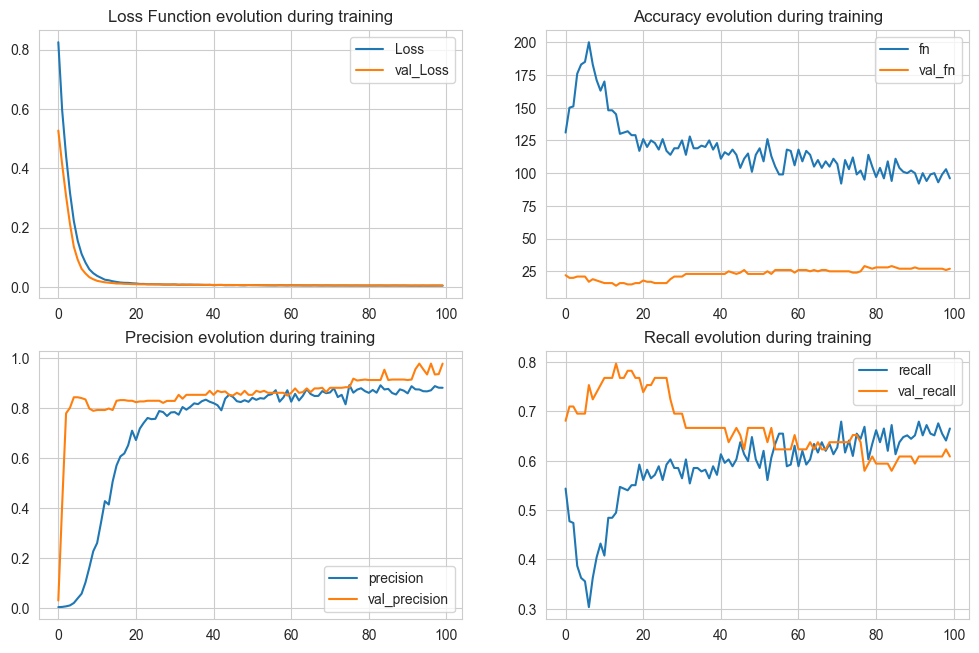

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

4985/4985 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step
Train Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.95      1.00       0.97          1.00
recall         1.00   0.57      1.00       0.79          1.00
f1-score       1.00   0.72      1.00       0.86          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159195      9]
 [   122    165]]

Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.94      1.00       0.97          1.00
recall        1.00   0.55      1.00       0.78          1.00
f1-score      1.00   0.69      1.00       0.85          1.00
support   85307.00 136.00      1.00  

# 4. 2. XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_curve

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / max(pos, 1)

xgb_clf = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="aucpr",
    scale_pos_weight=scale_pos_weight
)

xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

y_train_prob = xgb_clf.predict_proba(X_train)[:, 1]
y_test_prob  = xgb_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
f1s = 2 * precision * recall / (precision + recall + 1e-12)
best_idx = np.argmax(f1s)
best_threshold = thresholds[max(best_idx - 1, 0)]

y_train_pred = (y_train_prob >= best_threshold).astype(int)
y_test_pred  = (y_test_prob  >= best_threshold).astype(int)

print(f"Best threshold (by F1 on test PR-curve): {best_threshold:.4f}")

print_score(y_train, y_train_pred, train=True)
print_score(y_test,  y_test_pred,  train=False)

scores_dict["XGBoost"] = {
    "Train_F1": f1_score(y_train, y_train_pred),
    "Test_F1":  f1_score(y_test,  y_test_pred),
    "Test_PR_AUC": average_precision_score(y_test, y_test_prob),
}


Best threshold (by F1 on test PR-curve): 0.7873
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.84      1.00       0.92          1.00
f1-score      1.00   0.88      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_________________

# 4. 3. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.92      1.00       0.96          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.86      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 4. CatBoost

In [32]:
from catboost import CatBoostClassifier

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
class_weights = [1.0, neg / max(pos, 1)]

cb_clf = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.03,
    depth=6,
    loss_function="Logloss",
    eval_metric="PRAUC",
    class_weights=class_weights,
    random_seed=42,
    verbose=0
)

cb_clf.fit(X_train, y_train)


In [33]:
from sklearn.metrics import f1_score, average_precision_score

y_train_pred = cb_clf.predict(X_train).astype(int)
y_test_pred  = cb_clf.predict(X_test).astype(int)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

y_test_prob = cb_clf.predict_proba(X_test)[:, 1]

scores_dict["CatBoost"] = {
    "Train": f1_score(y_train, y_train_pred),
    "Test":  f1_score(y_test, y_test_pred),
    "Test_PR_AUC": average_precision_score(y_test, y_test_prob),
}


Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.90      1.00       0.95          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   0.95      1.00       0.97          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159173     31]
 [     0    287]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.76      1.00       0.88          1.00
recall        1.00   0.88      1.00       0.94          1.00
f1-score      1.00   0.82      1.00       0.91          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# 4. 5. KNN

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    f1_score
)

# Define KNN pipeline: Standardization + KNN classifier
knn_clf = Pipeline([
    ("scaler", StandardScaler()),  # Normalize features to zero mean and unit variance
    ("knn", KNeighborsClassifier(
        n_neighbors=15,            # Number of nearest neighbors
        weights="distance",        # Closer neighbors have higher influence
        metric="minkowski",        
        n_jobs=-1                  
    ))
])

# Train the KNN model
knn_clf.fit(X_train, y_train)

# Predict class probabilities on test set (needed for ROC-AUC and PR-AUC)
y_test_prob = knn_clf.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels using a default threshold of 0.5
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_pred = knn_clf.predict(X_train)

# Evaluate model performance
print("KNN Results")
print("ROC-AUC :", roc_auc_score(y_test, y_test_prob))
print("PR-AUC  :", average_precision_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred, digits=4))

scores_dict['KNN'] = {
    'Train': f1_score(y_train, y_train_pred),
    'Test' : f1_score(y_test,  y_test_pred)
}


KNN Results
ROC-AUC : 0.9482782428033283
PR-AUC  : 0.835538939249373
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     85307
           1     0.8661    0.8088    0.8365       136

    accuracy                         0.9995     85443
   macro avg     0.9329    0.9043    0.9181     85443
weighted avg     0.9995    0.9995    0.9995     85443



# 5. Model Comparaison

<Axes: >

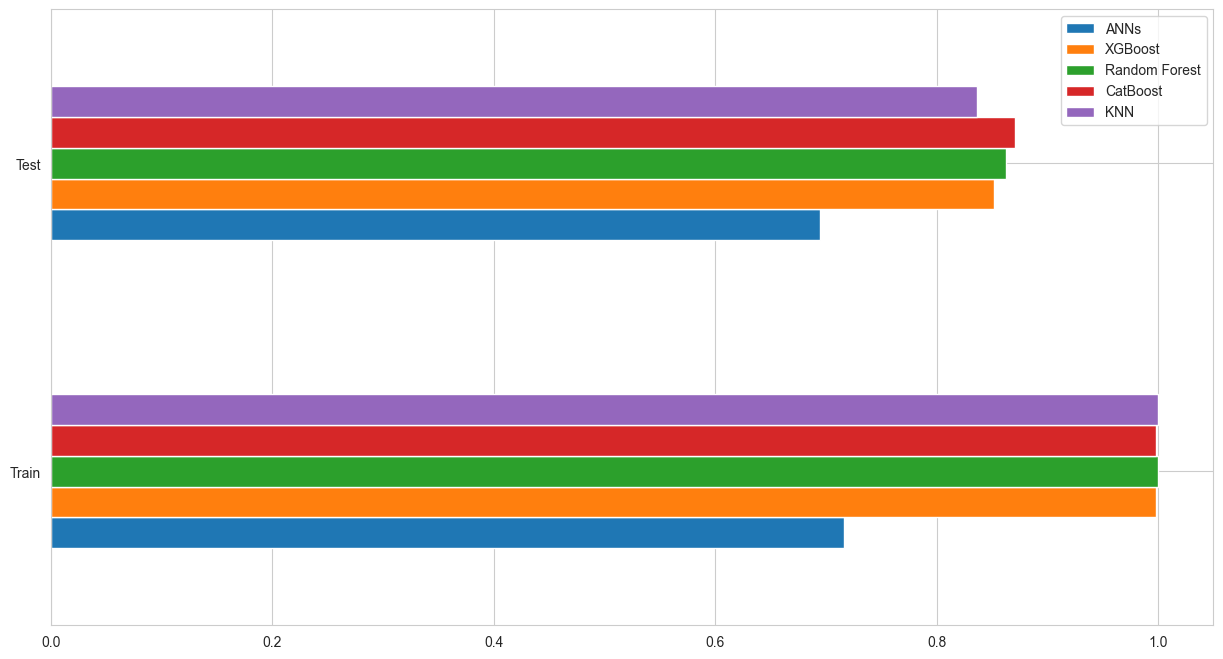

In [28]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))